# The random phase approximation (RPA)


The Lindhard susceptibility $\chi_0$ is the exact susceptibility for the non-interacting case $U=0$, however for finite interactions the susceptibility of the system $\chi$ is given by the Bethe-Salpeter equation

$$ \chi = \chi_0 + \chi_0 \Gamma \chi $$

where $\Gamma$ is the particle-hole irreducible vertex function, containing all diagrams with insertions of the interaction that can not be separated by cutting a pair of particle-hole single-particle propagators $G G$.

The first order contribution to the vertex $\Gamma$ is the bare interaction $U$ and the approximation

$$ \Gamma = U/2 $$

gives the so-called random phase approximation for $\chi$, i.e.

$$ \chi_{RPA} = \chi_0 + \chi_0 \frac{U}{2} \chi_{RPA} $$

Rewriting this equation gives $\chi_{RPA}$ as

$$ \chi_{RPA} = \frac{\chi_0}{1 - \frac{U}{2} \chi_0} $$

note that the denominator of this equation can in general go to zero, whereby the susceptibility $\chi_{RPA}$ diverges. Whence the RPA approximation can be used to compute instabilities of the system towards, e.g., anti-ferromagnetic symmetry breaking.

As an example we compute $\chi_{RPA}$ for the square lattice and the enhancement of the $\mathbf{q} = (\pi, \pi)$ peak as a function of $U$.

RPA predicts a phase transition to an antiferromagnetic state at *finite temperatures*. In two dimensions this is unphysical since the Mermin Wagner theorem tells us that the phase transition only occurs at zero temperature. 

We will later see how to remedy this shortcoming of RPA using the TPSC approach.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Imports 
from triqs.lattice import BravaisLattice, BrillouinZone
from triqs.gf import MeshBrZone, MeshImFreq, Gf, MeshProduct
from h5 import HDFArchive
from triqs.plot.mpl_interface import plt, oplot
plt.rcParams["figure.dpi"] = 100 # make figures bigger
import numpy as np
from math import cos, pi

In [4]:
# Reload the previous result
with HDFArchive("chi0_wk.h5",'r') as R:
    chi0_wk = R['chi0_wk']

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 1 

Using the same code at for non-interacting susceptibility
(Cf 02s-Lindhard), plot the RPA susceptibility
for $U = 2.7$ as a color plot (and 3d plot).


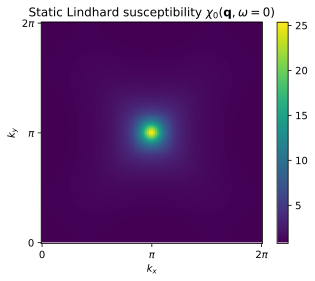

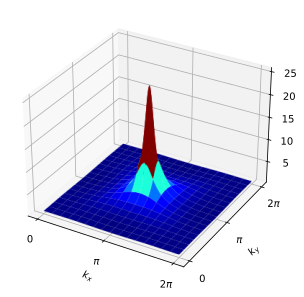

In [5]:
# chi in the RPA approximation
U = 2.7
chi= lambda qx, qy: (chi0_wk(0,(qx,qy,0)) / (1. - U/2 * chi0_wk(0, (qx,qy,0)))).real

# Make a simple 2d grid
nk = chi0_wk.mesh[1].dims[0] + 1       
lsp = np.linspace(0, 2*pi, nk, endpoint=True)
kx, ky = np.meshgrid(lsp, lsp)

# 2d color plot
plt.figure(figsize=(5,4),dpi=80)
plt.pcolor(kx, ky, np.vectorize(chi)(kx, ky), rasterized=True)
plt.xlim(0, 2*pi); plt.ylim(0, 2*pi)
# decoration
plt.colorbar()
plt.xticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"])    
plt.yticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"])
plt.xlabel(r'$k_x$'); plt.ylabel(r'$k_y$')
plt.title('Static Lindhard susceptibility $\chi_0(\mathbf{q}, \omega=0)$')
plt.axis('scaled')

# Here is a 3d plot. 
fig = plt.figure(figsize=(6,5),dpi=100)
ax  = plt.axes(projection='3d')
ax.plot_surface(kx, ky, np.vectorize(chi)(kx, ky), cmap="jet", rstride=8, cstride=8, rasterized=True)
ax.set_xlabel(r"$k_x$"); ax.set_ylabel(r"$k_y$"); ax.set_zlabel(r"$\chi_\mathrm{RPA}$");
ax.set_xticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"])
ax.set_yticks([0, pi, 2*pi],[r"0",r"$\pi$",r"$2\pi$"]);

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 2: Plot along some path for different values of $U$

Using the same code as for non-interacting susceptibility
(Cf 02s-Lindhard), plot $\chi_{RPA}$ 
for various values of $U$  (e.g. in `np.arange(1., 2.8, 0.2)`)
along the path
in the Brillouin Zone: $\Gamma \rightarrow X \rightarrow M \rightarrow \Gamma$
where $\Gamma = (0,  0 , 0)$, $X = (\pi, \pi, 0)$ and  $M = (\pi, 0,  0)$.

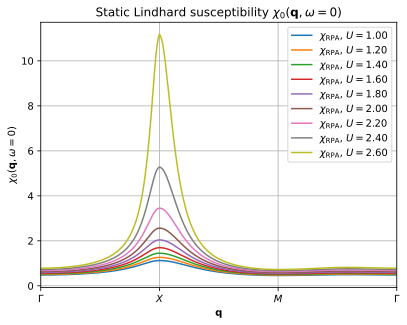

In [6]:
import itertools

# function to generates a linear set of points between qi and qf
n_step = 100
def path(qi, qf):
    for x in np.arange(0, 1, 1./n_step):
        yield (1-x) * np.array(qi) + x * np.array(qf) 

G = (0,  0 , 0)
X = (pi, pi, 0) 
M = (pi, 0,  0)
   
plt.figure(dpi=100)
for U in np.arange(1, 2.8, 0.2):
    chi = lambda k: np.squeeze(chi0_wk(0, k) / (1. - U/2 * chi0_wk(0, k))).real
    plt.plot([chi(k).real for k in itertools.chain(path(G, X), path(X, M), path(M, G) )], '-', 
             label=r'$\chi_\mathrm{RPA}$, $U=%2.2f$' % U)
    
#decoration
plt.xlim(0, 3*n_step) # window size
plt.grid()
plt.xticks([0, n_step, 2*n_step, 3*n_step],[r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$'])
plt.title('Static Lindhard susceptibility $\chi_0(\mathbf{q},\omega=0)$')
plt.xlabel(r'$\mathbf{q}$'); plt.ylabel(r'$\chi_0(\mathbf{q},\omega=0)$')
plt.legend();

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 3:  Critical $U$

At some critical $U_c$ the RPA susceptibility diverges $\chi_{RPA} \rightarrow \infty$. To determine $U_c$ we can study the root of the inverse susceptibility $\chi_{RPA}^{-1}$.

For the square lattice it is sufficient to study the response at $\mathbf{Q}_{AF}= (\pi, \pi)$ since this is the momentum vector where the response diverges. Analytically this occurs when the denominator is zero $1 - \frac{U}{2} \chi(\mathbf{Q}_{AF}, 0) = 0$, i.e.

$$ U_c^{(RPA)} = \frac{2}{\chi(\mathbf{Q}_{AF}, 0)} $$

Plot $\chi_{RPA}^{-1} (\mathbf{Q}_{AF}, 0)$ vs $U$ to numerically determine the critical $U$ in the RPA approximation and compare to a direct calculation of $U_c^{(RPA)}$.


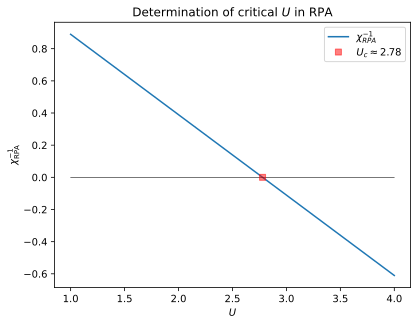

In [7]:
k_AF = (pi, pi, 0)

# Critical U - analytical solution
U_c = 2 / np.squeeze(chi0_wk(0, k_AF)).real

Ur = np.linspace(1, 4,100)
chi_inv = lambda U: np.squeeze((1. - U/2 * chi0_wk(0, k_AF)) / chi0_wk(0, k_AF)).real

plt.plot(Ur, chi_inv(Ur), label=r'$\chi_{RPA}^{-1}$')
plt.plot(Ur, np.zeros_like(Ur), 'k', lw=0.5)
plt.plot(U_c, 0, 'rs', label=r'$U_c \approx %2.2f$'%U_c, alpha=0.5) # a red point at the analytic solution

# decoration
plt.title("Determination of critical $U$ in RPA")
plt.xlabel(r'$U$')
plt.ylabel(r'$\chi_\mathrm{RPA}^{-1}$')
plt.legend();